In [1]:
from sklearn.datasets import load_digits

data = load_digits()
print(data["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [2]:
import numpy as np

data.data.shape, data.target.shape

((1797, 64), (1797,))

In [3]:
y = data.target.reshape(-1,1)
y.shape

(1797, 1)

In [4]:
X = data.data.reshape((1797, 8, 8))
X.shape

(1797, 8, 8)

## Preprocess data

In [5]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse=False).fit_transform(y)
y.shape, y[0]

((1797, 10), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
from sklearn.preprocessing import Normalizer

X = Normalizer().fit_transform(X.reshape((1797, 64,)))
X = X.reshape((1797, 8, 8,))
X[0]

array([[0.        , 0.        , 0.09024036, 0.23462493, 0.16243265,
        0.01804807, 0.        , 0.        ],
       [0.        , 0.        , 0.23462493, 0.27072108, 0.18048072,
        0.27072108, 0.09024036, 0.        ],
       [0.        , 0.05414422, 0.27072108, 0.03609614, 0.        ,
        0.19852879, 0.14438458, 0.        ],
       [0.        , 0.07219229, 0.21657686, 0.        , 0.        ,
        0.14438458, 0.14438458, 0.        ],
       [0.        , 0.09024036, 0.14438458, 0.        , 0.        ,
        0.16243265, 0.14438458, 0.        ],
       [0.        , 0.07219229, 0.19852879, 0.        , 0.01804807,
        0.21657686, 0.1263365 , 0.        ],
       [0.        , 0.03609614, 0.25267301, 0.09024036, 0.18048072,
        0.21657686, 0.        , 0.        ],
       [0.        , 0.        , 0.10828843, 0.23462493, 0.18048072,
        0.        , 0.        , 0.        ]])

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1617, 8, 8), (180, 8, 8), (1617, 10), (180, 10))

## Building the models

In [8]:
def load_data(seed=0):
    np.random.seed(seed)
    data = load_digits()
    X = Normalizer().fit_transform(data.data).reshape((1797, 8, 8,))
    y = OneHotEncoder(sparse=False).fit_transform(data.target.reshape(-1,1))
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=SEED)
    return xtrain, xtest, ytrain, ytest

In [9]:
import keras as k
import keras.layers as l


def init_model(seed=0):
    np.random.seed(seed)
    return k.Sequential([
        l.Input(shape=(8, 8,)),
        l.Conv1D(64, kernel_size=4, activation="relu"),
        l.MaxPooling1D(pool_size=2),
        l.Flatten(),
        l.Dense(10, activation="softmax")
    ])


init_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 64)             2112      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________


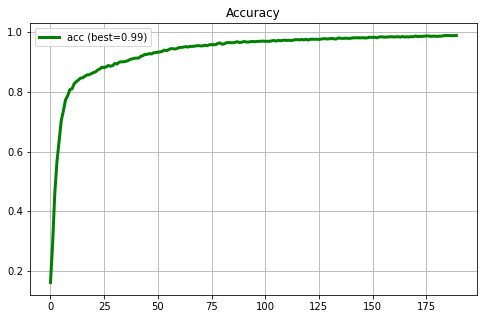

6/6 [==============================] - 0s 388us/step - loss: 0.0689 - accuracy: 0.9778
Acc.: 0.9777777791023254


In [16]:
from matplotlib import pyplot as plt
import tensorflow as tf


def train(seed=0, epochs=190, batch_size=128):
    np.random.seed(seed)
    xtrain, xtest, ytrain, ytest = load_data(SEED)
    model = init_model(SEED)
    model.compile(optimizer="adam", metrics=["accuracy"], loss="categorical_crossentropy")
    history = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=False)
    return history, model


def plot_history(history):
    hy = history.history["accuracy"]
    plt.figure(figsize=(8,5))
    plt.grid()
    plt.plot(range(len(hy)), hy, c="g", linewidth=3)
    plt.title("Accuracy")
    plt.legend([f"acc (best={round(np.max(hy), 2)})"])
    plt.show()
    

SEED = 5
np.random.seed(SEED)
tf.random.set_seed(SEED)
history, model = train(SEED)
plot_history(history)
loss, acc = model.evaluate(x=xtest, y=ytest)
print("Acc.:", acc)